In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from plotly.express import histogram
from plotly.express import scatter
from plotly.express import imshow

In [ ]:
# Load data from JSON file
with open("/content/stock_data_0.json", "r") as file:
    data = json.load(file)

# Convert JSON data to pandas DataFrame
df = pd.DataFrame(data)

In [ ]:
# 1) Handling missing data
df.replace('', np.nan, inplace=True)
print("Count of null values before filling:")
print(df.isnull().sum())
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns

# Fill missing values for numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for non-numeric columns with mode
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nCount of null values after filling:")
print(df.isnull().sum())

Count of null values before filling:
NAME                0
TYPE             3289
COST             4320
STRENGTH            0
WEAKNESS            0
OPPORTUNITIES       0
THREATS             0
P_LOW            3246
P_HIGH           3246
YEARLY_LOW       3297
YEARLY_HIGH      3297
dtype: int64

Count of null values after filling:
NAME             0
TYPE             0
COST             0
STRENGTH         0
WEAKNESS         0
OPPORTUNITIES    0
THREATS          0
P_LOW            0
P_HIGH           0
YEARLY_LOW       0
YEARLY_HIGH      0
dtype: int64


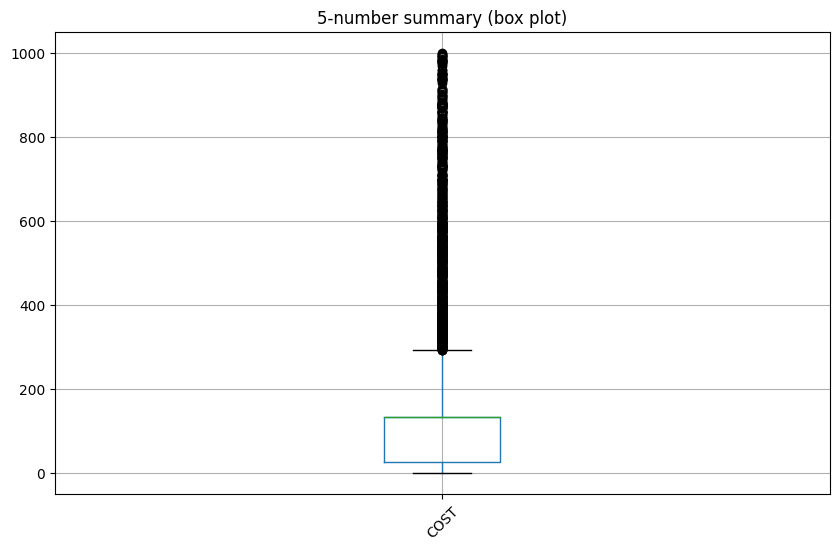

In [ ]:
# 2) 5-number summary (box plot)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].boxplot(figsize=(10, 6))
plt.title("5-number summary (box plot)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3) Variance and standard deviation
variance = df[numeric_cols].var()
std_deviation = df[numeric_cols].std()
print("Variance:\n", variance)
print("\nStandard Deviation:\n", std_deviation)

Variance:
 COST    23613.272703
dtype: float64

Standard Deviation:
 COST    153.666108
dtype: float64


In [ ]:
# 4) Coefficient of variation
coefficient_of_variation = (std_deviation / df[numeric_cols].mean()) * 100
print("\nCoefficient of Variation:\n", coefficient_of_variation)



Coefficient of Variation:
 COST    116.659918
dtype: float64


In [ ]:

# 5) Z-scores
z_scores = df[numeric_cols].apply(zscore)
print("\nZ-scores:\n", z_scores)



Z-scores:
           COST
0    -0.851055
1    -0.821118
2     0.000000
3     0.000000
4     0.040861
...        ...
9538  0.000000
9539  0.000000
9540  0.000000
9541  0.183060
9542  0.092924

[9543 rows x 1 columns]


In [ ]:

# 6) Skewness and kurtosis

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate skewness and kurtosis for numeric columns only
skewness = df[numeric_cols].skew()
kurtosis = df[numeric_cols].kurtosis()

print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)




Skewness:
 COST    2.820867
dtype: float64

Kurtosis:
 COST    9.446592
dtype: float64


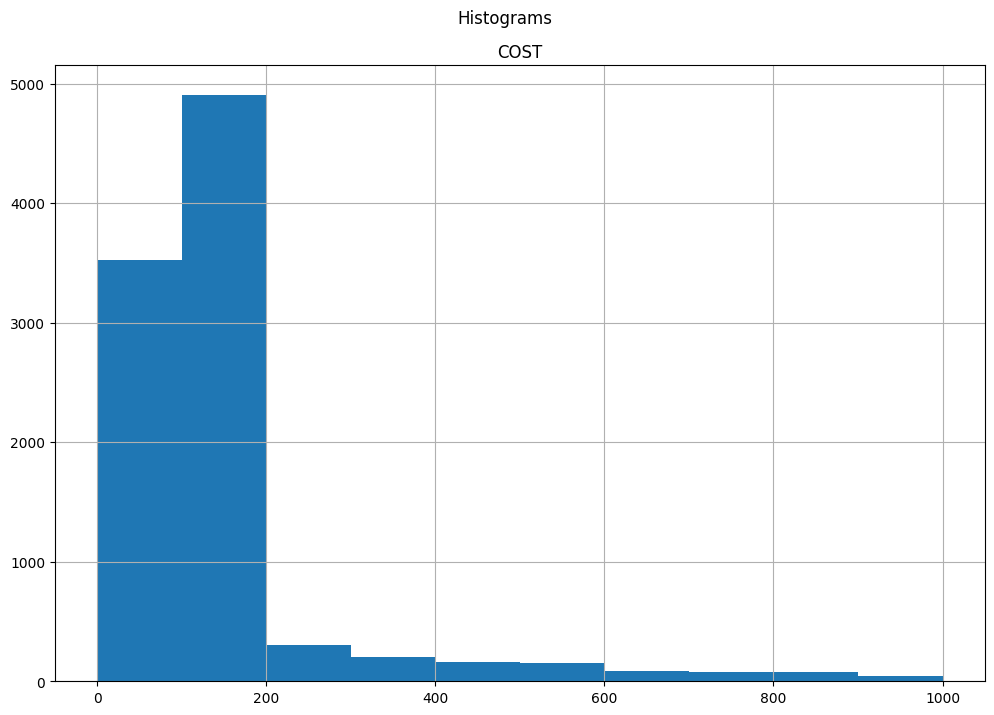

In [ ]:

# 7) Histogram
df.hist(figsize=(12, 8))
plt.suptitle("Histograms", y=0.95)
plt.show()


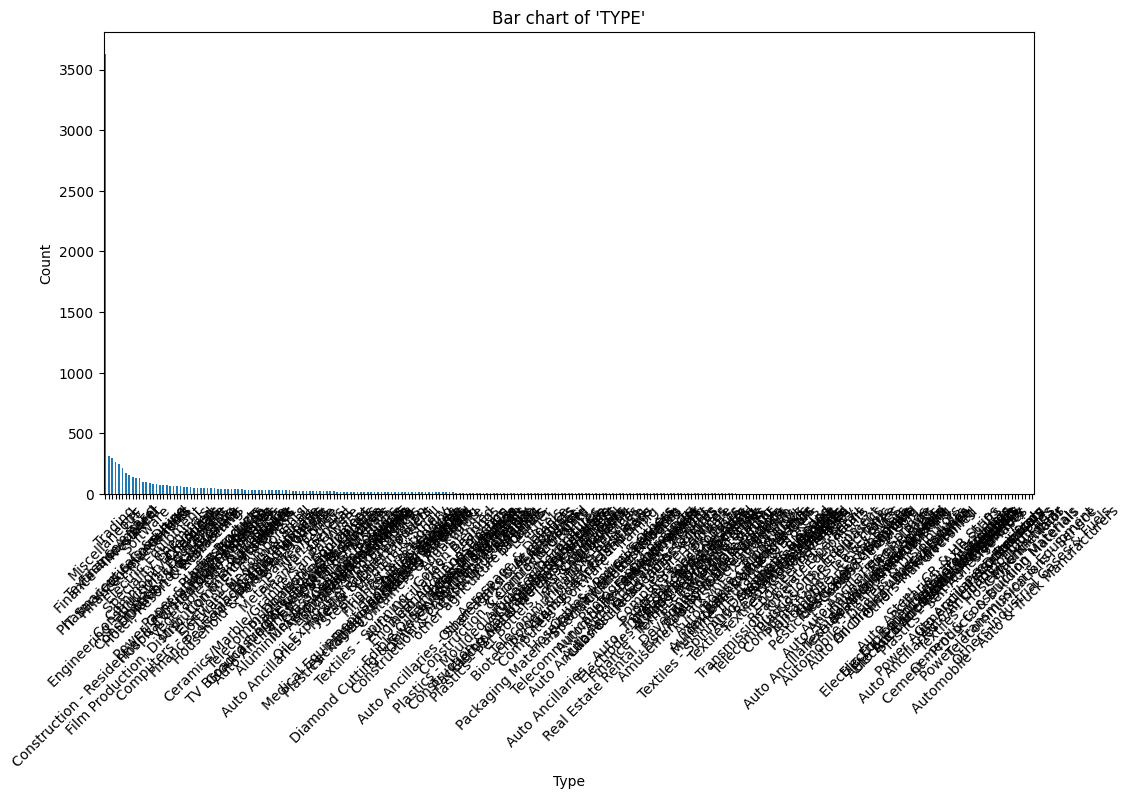

In [ ]:

# 8) Bar chart
plt.figure(figsize=(12, 6))
df['TYPE'].value_counts().plot(kind='bar')
plt.title("Bar chart of 'TYPE'")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


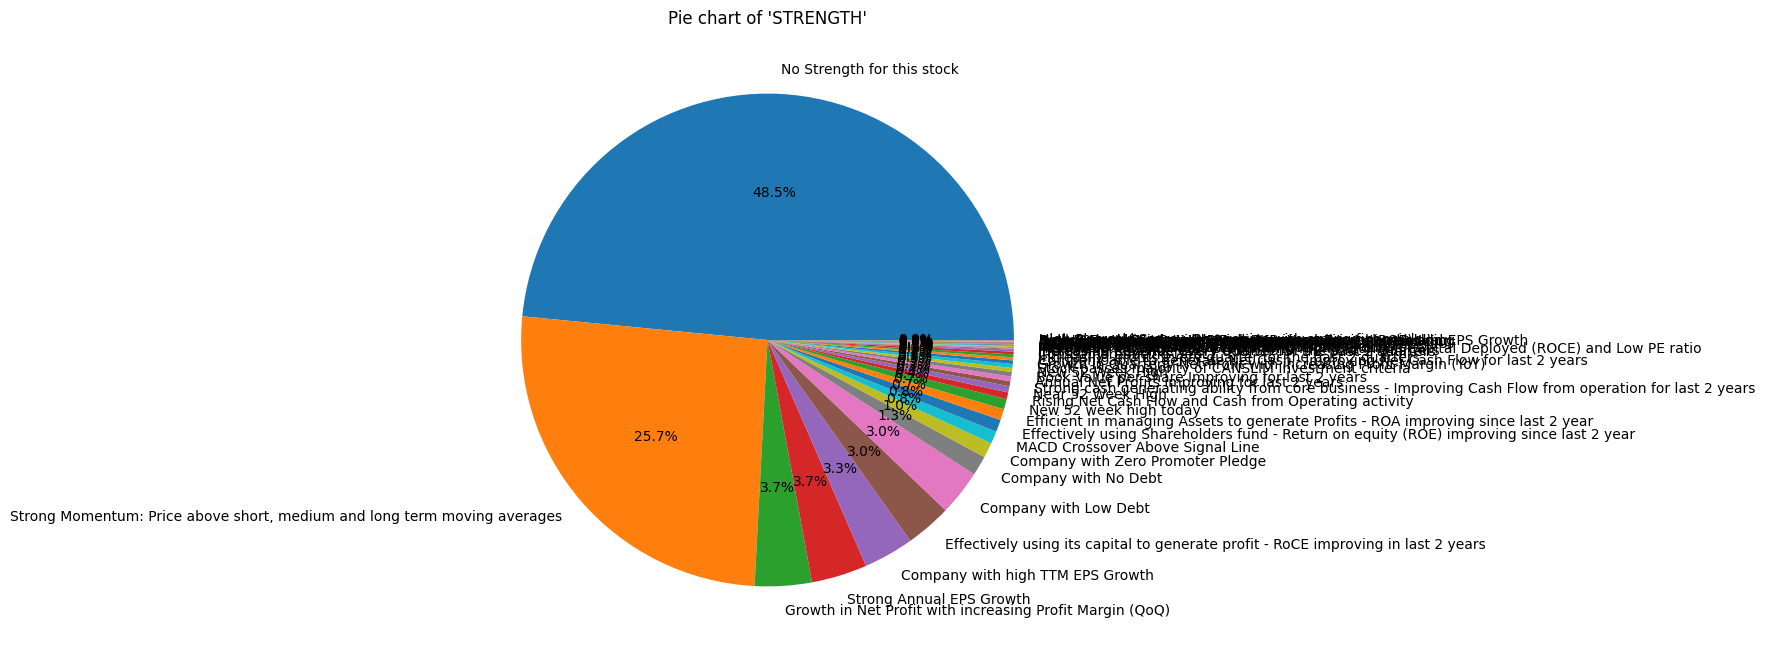

In [ ]:

# 9) Pie chart
plt.figure(figsize=(10, 8))
df['STRENGTH'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie chart of 'STRENGTH'")
plt.ylabel("")
plt.show()


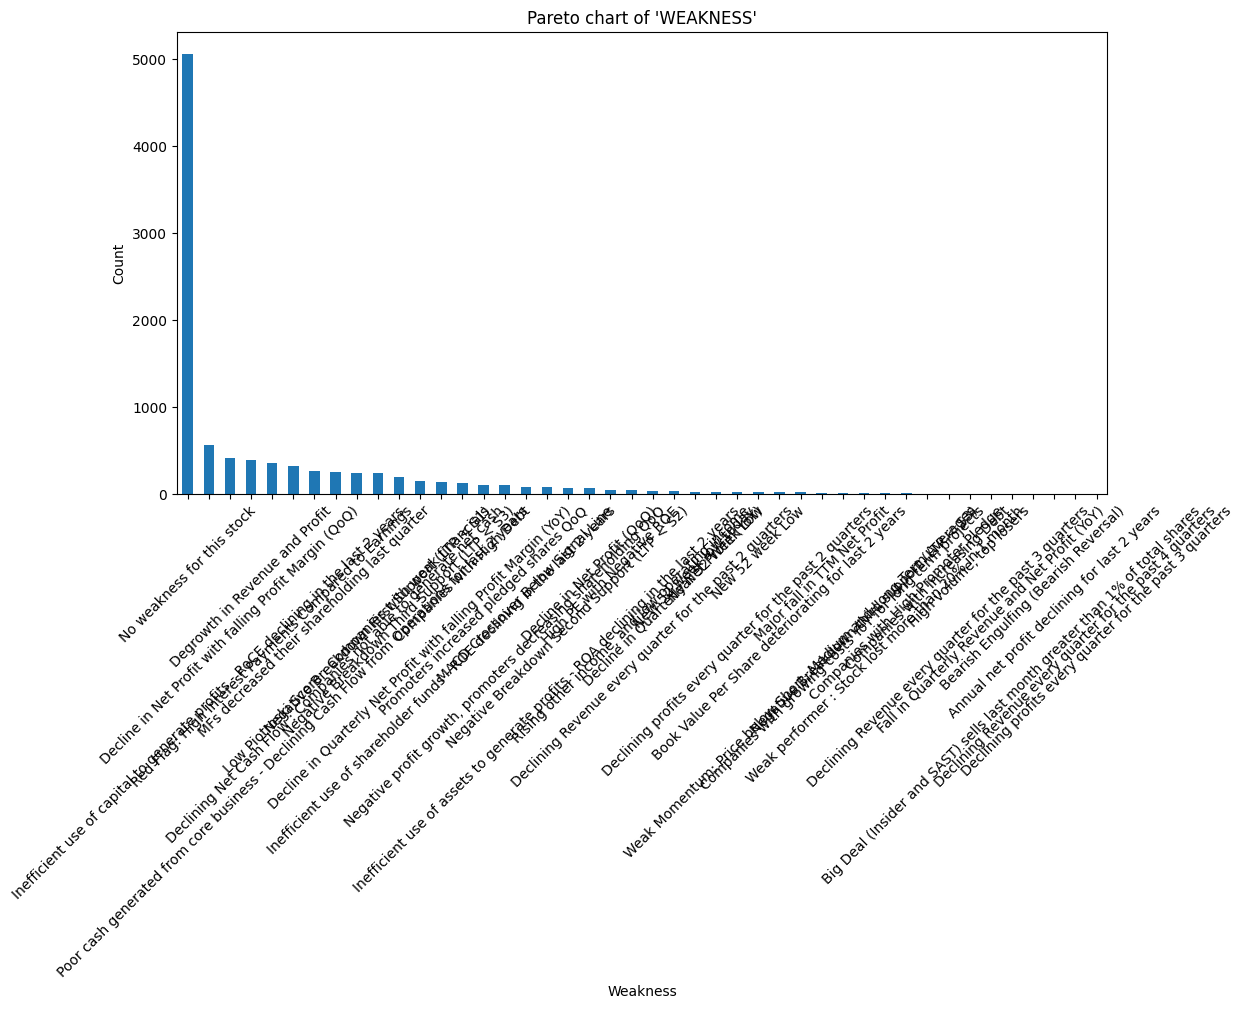

In [ ]:

# 10) Pareto chart
plt.figure(figsize=(12, 6))
df['WEAKNESS'].value_counts().plot(kind='bar')
plt.title("Pareto chart of 'WEAKNESS'")
plt.xlabel("Weakness")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


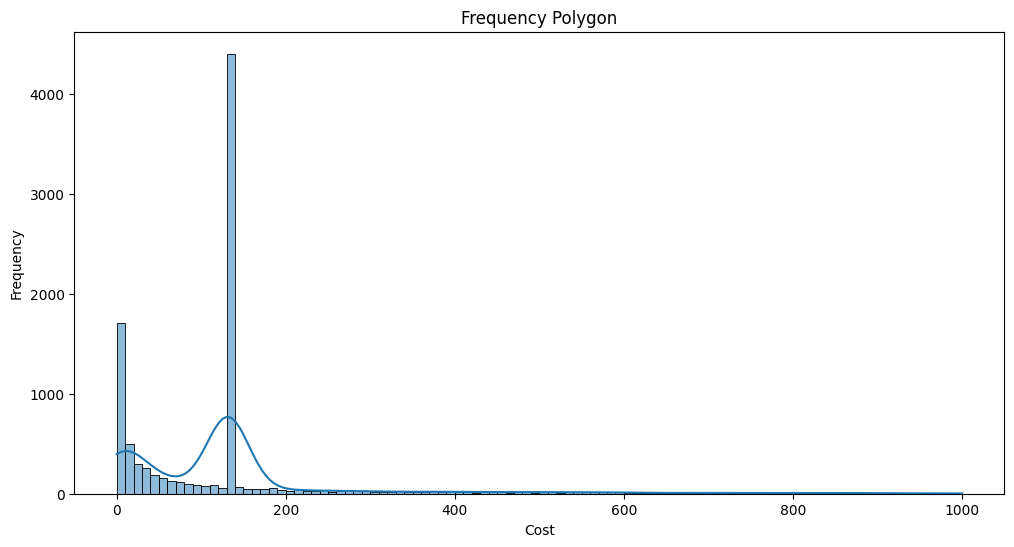

In [ ]:

# 11) Frequency polygon
plt.figure(figsize=(12, 6))
sns.histplot(df['COST'], kde=True)
plt.title("Frequency Polygon")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()


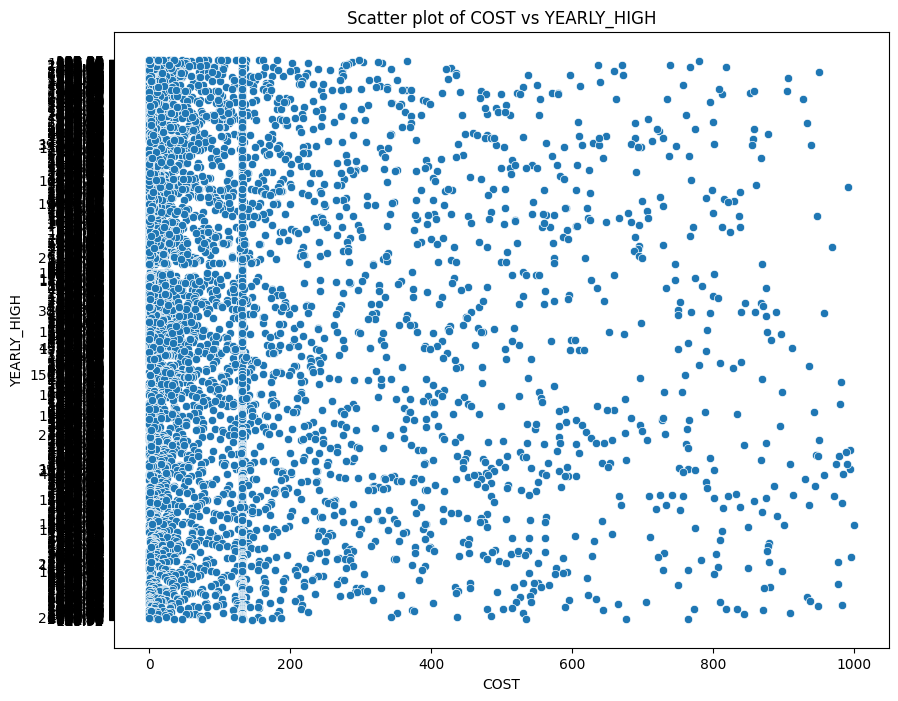

In [ ]:
# 13) Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='COST', y='YEARLY_HIGH')
plt.title("Scatter plot of COST vs YEARLY_HIGH")
plt.show()

In [ ]:

# 14) Mahalanobis Distance
import numpy as np
import pandas as pd
from scipy.spatial import distance


# Compute covariance matrix and mean vector
covariance_matrix = np.cov(df[numeric_cols].T)
mean_vector = np.mean(df[numeric_cols], axis=0)  # Calculate mean along each column

# Ensure covariance matrix is 2-dimensional
if len(covariance_matrix.shape) == 0:
    covariance_matrix = np.array([[covariance_matrix]])

# Compute Mahalanobis distance for each row
mahalanobis_distances = []
for index, row in df[numeric_cols].iterrows():
    mahalanobis_dist = distance.mahalanobis(row, mean_vector, np.linalg.inv(covariance_matrix))
    mahalanobis_distances.append(mahalanobis_dist)

# Convert the list of distances to a DataFrame
mahalanobis_df = pd.DataFrame(mahalanobis_distances, columns=["Mahalanobis Distance"])

# Now you have a DataFrame containing the Mahalanobis distances for each row
print(mahalanobis_df)
# Define the threshold for Mahalanobis distance
threshold = 5.5

# Filter outliers based on Mahalanobis distance exceeding the threshold
outliers_index = mahalanobis_df[mahalanobis_df['Mahalanobis Distance'] > threshold].index

# Get the company names of the outliers
outliers_companies = df.loc[outliers_index, 'NAME']

# Print outliers along with their company names
print("Outliers:")
print(outliers_companies)


      Mahalanobis Distance
0                 0.851010
1                 0.821075
2                 0.000000
3                 0.000000
4                 0.040859
...                    ...
9538              0.000000
9539              0.000000
9540              0.000000
9541              0.183050
9542              0.092919

[9543 rows x 1 columns]
Outliers:
1715                        Torrent Power Ltd.
4879                          MM Forgings Ltd.
5268                 Maharashtra Seamless Ltd.
6092                Jai Balaji Industries Ltd.
6206                    Insolation Energy Ltd.
6454                       IFB Industries Ltd.
6543     Home First Finance Company India Ltd.
7133       Great Eastern Shipping Company Ltd.
7594                            DSP Liquid ETF
8262                         CARE Ratings Ltd.
8287                 Capri Global Capital Ltd.
8366                  Brigade Enterprises Ltd.
8631                     Bemco Hydraulics Ltd.
8807    Authum Investment & In

In [ ]:

# 15) K-means clustering
# Set the number of clusters
n_clusters = 3

# Create the KMeans object with explicitly setting n_init
kmeans = KMeans(n_clusters=n_clusters, n_init=10)

# Fit the model to data
kmeans.fit(df[numeric_cols])

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to  DataFrame
df['Cluster'] = cluster_labels

# Now you have a DataFrame with an additional column indicating the cluster for each data point
print(df)


                                                  NAME  \
0                                    A & M Febcon Ltd.   
1                                 A F Enterprises Ltd.   
2                              A and M Jumbo Bags Ltd.   
3                                   A G Universal Ltd.   
4                                     A K Spintex Ltd.   
...                                                ...   
9538                                Aachal Alloys Ltd.   
9539                  Aakash Exploration Services Ltd.   
9540  Aakar Engineering and Manufacturing Company Ltd.   
9541                                 Aamcol Tools Ltd.   
9542                             Aartech Solonics Ltd.   

                                     TYPE        COST  \
0                           Miscellaneous    0.950000   
1                    Finance - Investment    5.550000   
2                  Containers & Packaging  131.721426   
3                                 Trading  131.721426   
4                 

In [ ]:

# Set the number of clusters
n_clusters = 3

# Create the KMeans object with explicitly setting n_init
kmeans = KMeans(n_clusters=n_clusters, n_init=10)

# Fit the model to  data
kmeans.fit(df[numeric_cols])

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to  DataFrame
df['Cluster'] = cluster_labels

# Now you have a DataFrame with an additional column indicating the cluster for each data point
print(df)


                                                  NAME  \
0                                    A & M Febcon Ltd.   
1                                 A F Enterprises Ltd.   
2                              A and M Jumbo Bags Ltd.   
3                                   A G Universal Ltd.   
4                                     A K Spintex Ltd.   
...                                                ...   
9538                                Aachal Alloys Ltd.   
9539                  Aakash Exploration Services Ltd.   
9540  Aakar Engineering and Manufacturing Company Ltd.   
9541                                 Aamcol Tools Ltd.   
9542                             Aartech Solonics Ltd.   

                                     TYPE        COST  \
0                           Miscellaneous    0.950000   
1                    Finance - Investment    5.550000   
2                  Containers & Packaging  131.721426   
3                                 Trading  131.721426   
4                 

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df[numeric_cols].dropna())

# Fit LOF and get anomaly scores
lof.fit_predict(scaled_data)

# Print DataFrame with LOF scores
print(df)

                                                  NAME  \
0                                    A & M Febcon Ltd.   
1                                 A F Enterprises Ltd.   
2                              A and M Jumbo Bags Ltd.   
3                                   A G Universal Ltd.   
4                                     A K Spintex Ltd.   
...                                                ...   
9538                                Aachal Alloys Ltd.   
9539                  Aakash Exploration Services Ltd.   
9540  Aakar Engineering and Manufacturing Company Ltd.   
9541                                 Aamcol Tools Ltd.   
9542                             Aartech Solonics Ltd.   

                                     TYPE        COST  \
0                           Miscellaneous    0.950000   
1                    Finance - Investment    5.550000   
2                  Containers & Packaging  131.721426   
3                                 Trading  131.721426   
4                 